# 📚 Meme Kanseri Teşhis Sistemi - Proje İçindekiler

Bu proje, **Breast Cancer Wisconsin (Diagnostic)** veri setini kullanarak meme kanseri teşhisi için makine öğrenmesi ve derin öğrenme modelleri geliştirmeyi hedeflemektedir. Ayrıca, proje çıktıları **Streamlit** kullanılarak interaktif bir web uygulaması olarak sunulmuştur.

---

### 📂 Proje Adımları:

1. **Veri Yükleme ve Temizleme**  
   - Uyarı Mesajlarının Gizlenmesi  
   - Veri Setinin Yüklenmesi ve Ön İşleme  
   - Hedef Değişken Kodlama  

2. **Veri Keşfi ve Görselleştirme**  
   - Sınıf Dağılımı  
   - Korelasyon Isı Haritası  
   - Öznitelik Dağılımları (Boxplot, Histogram)  
   - PCA (Ana Bileşen Analizi)  

3. **Makine Öğrenmesi Modelleri**  
   - Random Forest  
   - Lojistik Regresyon  
   - SVM (Destek Vektör Makineleri)  
   - KNN (K-Nearest Neighbors)  
   - Naive Bayes  
   - XGBoost  
   - CatBoost  

4. **Hiperparametre Optimizasyonu**  
   - Random Forest için GridSearchCV  

5. **Derin Öğrenme Modeli (MLP)**  
   - Model Mimarisi ve Eğitim  
   - Eşik Ayarı ve Performans Değerlendirme  

6. **Model ve Parametrelerin Kaydedilmesi**  
   - MLP Modeli (`.h5` formatında)  
   - StandardScaler (`.pkl` formatında)  
   - Karar Eşiği (`.json` formatında)  
   - Özellik Sırası (`.csv` formatında)  

---

Bu içindekiler listesi, projenin her adımını ve kullanılan yöntemleri hızlıca gözden geçirmek için oluşturulmuştur. Her bölüm, veri işleme, model eğitimi ve sonuçların değerlendirilmesi adımlarını kapsamaktadır.  

### Uyarı Mesajlarını Gizleme

Bu kod bloğu, Python programının çalışma sırasında gereksiz uyarı (warning) mesajlarını gizlemek için kullanılır:

- **`warnings.filterwarnings("ignore")`**: Python `warnings` modülü ile tüm uyarı mesajlarını devre dışı bırakır. Bu, kodun daha temiz ve okunabilir olmasını sağlar.
- **`absl.logging.set_verbosity(absl.logging.ERROR)`**: TensorFlow gibi `absl` kütüphanesini kullanan kütüphanelerin hata seviyesini `ERROR` olarak ayarlayarak, yalnızca kritik hataları gösterir, bilgi ve uyarı mesajlarını gizler.

Bu adım, uzun eğitim süreçlerinde gereksiz konsol çıktılarının önüne geçmek için önemlidir.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

### Veri Seti Yükleme ve Temizleme

- **Veri Yükleme:** `data.csv` dosyası `pandas` ile veri çerçevesi (`DataFrame`) olarak yüklendi.  
- **Gereksiz Sütun Silme:** `Unnamed: 32` sütunu, boş veya gereksiz olduğu için kaldırıldı.

In [2]:
import pandas as pd

# Veri setini yükle
df = pd.read_csv("data.csv")

# Gereksiz sütunu kaldır 
if "Unnamed: 32" in df.columns:
    df = df.drop(columns=["Unnamed: 32"])

### Veri Setinin İlk 5 Satırını Görüntüleme

- **Veri Önizleme:** `df.head()` ile veri setinin ilk 5 satırı ekrana yazdırıldı.  

In [3]:
print("🔹 İlk 5 Satır:")
print(df.head())

🔹 İlk 5 Satır:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_

### Sütun İsimlerini Listeleme

- **Sütun Başlıkları:** `df.columns.tolist()` komutu, veri setindeki tüm sütun isimlerini liste olarak döndürür.  
- **Amaç:** Veri yapısını anlamak ve veri ön işleme aşamasında kullanılacak özellikleri belirlemek.  

In [4]:
print("\n🔹 Sütun İsimleri:")
print(df.columns.tolist())


🔹 Sütun İsimleri:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


### Veri Seti Bilgisi

- **Veri Özeti:** `df.info()` komutu, veri setinin sütun isimleri, veri tipleri, eksik değerler ve toplam bellek kullanımı gibi temel bilgilerini gösterir.  

In [5]:
print("\n🔹 Veri Bilgisi:")
print(df.info())


🔹 Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

In [6]:
print("🔍 Eksik Değer Kontrolü:")
print(df.isnull().sum())

🔍 Eksik Değer Kontrolü:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### Hedef Değişken (Diagnosis) Sınıf Dağılımı

- **Sınıf Dağılımı:** `value_counts()` ile `diagnosis` kolonundaki her bir sınıfın (B ve M) toplam örnek sayısı listelendi.  
- **Yüzdelik Dağılım:** `normalize=True` seçeneği ile sınıfların veri setindeki yüzde oranları hesaplandı.  
- **Amaç:** Sınıf dengesizliği varsa, model performansını etkileyebileceği için bu dengesizlik göz önünde bulundurulmalı.  

In [8]:
# Hedef değişken olan "diagnosis" kolonundaki sınıf dağılımı
print("⚖️ Sınıf Dağılımı:")
print(df["diagnosis"].value_counts())
print("\nYüzdelik dağılım:")
print(df["diagnosis"].value_counts(normalize=True) * 100)

⚖️ Sınıf Dağılımı:
diagnosis
B    357
M    212
Name: count, dtype: int64

Yüzdelik dağılım:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


### Görselleştirme Çıktıları

#### 🔬 Tümör Sınıf Dağılımı
- **Amaç:** `diagnosis` kolonundaki Malignant (M) ve Benign (B) sınıflarının sayısal dağılımını görmek.  
- **Yöntem:** `sns.countplot()` kullanılarak sınıf frekansları çubuk grafiği ile gösterildi.  

#### 📊 Özellikler Arası Korelasyon Isı Haritası
- **Amaç:** Özellikler arasındaki ilişkileri ve bağımlılıkları anlamak.  
- **Yöntem:** `corr()` ile hesaplanan korelasyon matrisinin `sns.heatmap()` ile görselleştirilmesi.  
- **Not:** `id` ve `diagnosis` sütunları korelasyon analizi için çıkarıldı.  

#### 🧪 radius_mean Özelliğinin Sınıflara Göre Dağılımı (Boxplot)
- **Amaç:** `radius_mean` özelliğinin sınıflara (M ve B) göre dağılımını gözlemlemek.  
- **Yöntem:** `sns.boxplot()` kullanılarak verinin yayılımı, ortanca ve uç değerleri gösterildi.  

#### 📈 radius_mean Dağılımı (Histogram + KDE)
- **Amaç:** `radius_mean` değerlerinin dağılımını ve sınıf farklarını görmek.  
- **Yöntem:** Histogram (`sns.histplot()`) ve KDE (yoğunluk) eğrisi ile birlikte görselleştirildi.  

#### 🧭 PCA - 2B Görselleştirme
- **Amaç:** Yüksek boyutlu veriyi iki boyuta indirip sınıfların ayrılabilirliğini görselleştirmek.  
- **Yöntem:** `StandardScaler` ile normalizasyon yapıldı ve `PCA` (Principal Component Analysis) ile 2 bileşen elde edildi. Sonuçlar iki boyutlu dağılım grafiğinde (`sns.scatterplot`) gösterildi.  


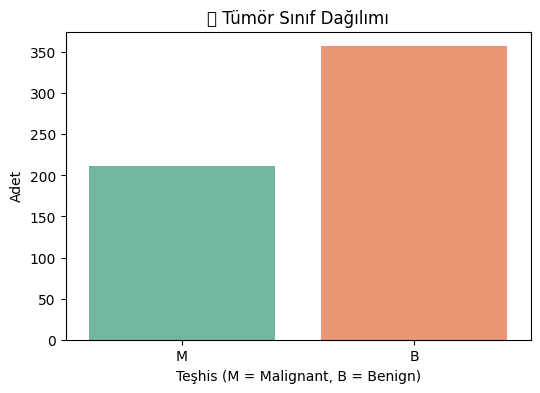

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sınıf dağılımı çubuğu (Malignant / Benign)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="diagnosis", palette="Set2")
plt.title("🔬 Tümör Sınıf Dağılımı")
plt.xlabel("Teşhis (M = Malignant, B = Benign)")
plt.ylabel("Adet")
plt.show()

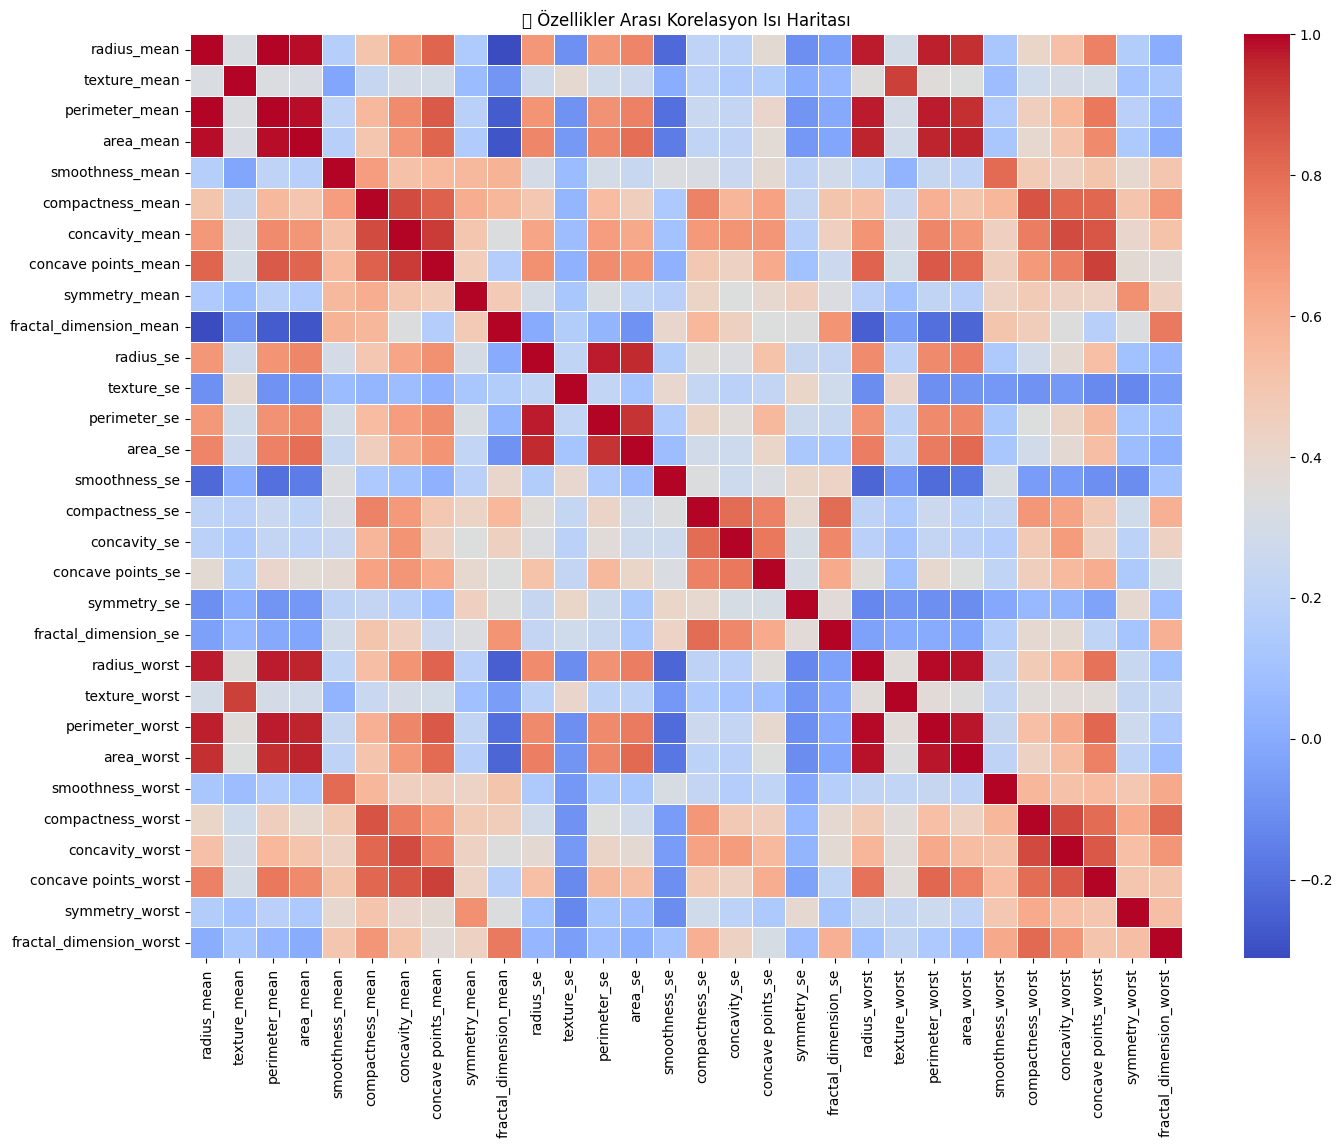

In [10]:
# 'id' ve 'diagnosis' çıkarılarak sadece sayısal değerlerle korelasyon analizi
corr = df.drop(columns=["id", "diagnosis"]).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("📊 Özellikler Arası Korelasyon Isı Haritası")
plt.show()

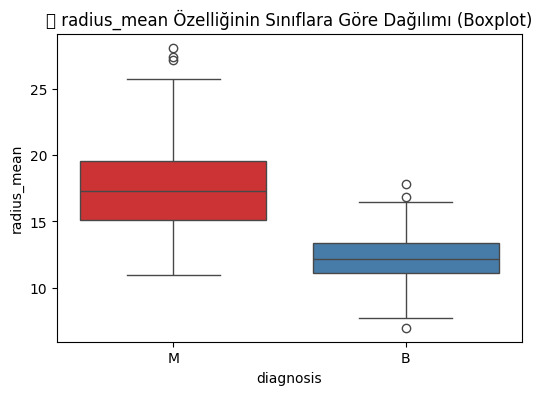

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="diagnosis", y="radius_mean", palette="Set1")
plt.title("🧪 radius_mean Özelliğinin Sınıflara Göre Dağılımı (Boxplot)")
plt.show()

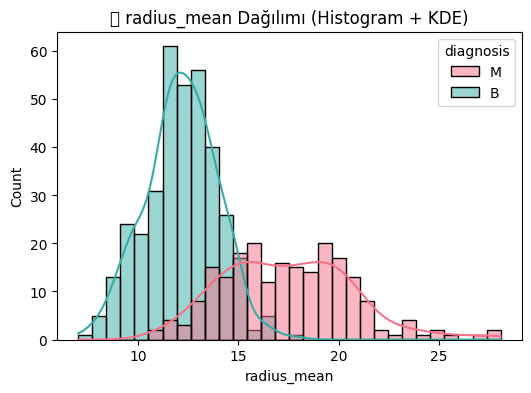

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="radius_mean", hue="diagnosis", bins=30, kde=True, palette="husl")
plt.title("📈 radius_mean Dağılımı (Histogram + KDE)")
plt.show()

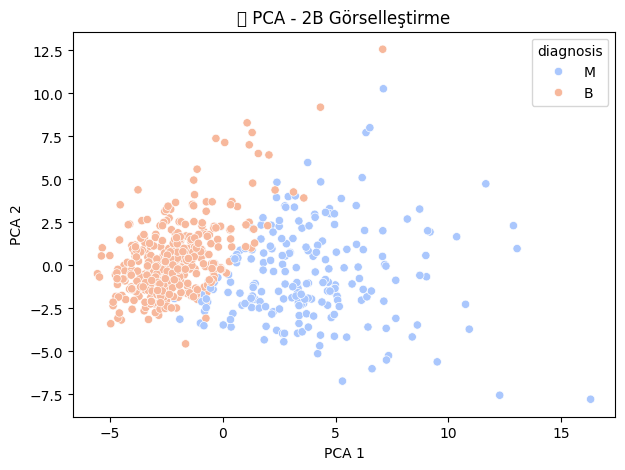

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sadece sayısal sütunları al, normalize et
features = df.drop(columns=["id", "diagnosis"])
scaled = StandardScaler().fit_transform(features)

# PCA ile boyut indirgeme (2 bileşen)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df["diagnosis"], palette="coolwarm")
plt.title("🧭 PCA - 2B Görselleştirme")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

### Model Eğitim Hazırlıkları - Pipeline

#### 📁 Veri Yükleme ve Ön İşleme
- **Etiket Kodlama:** `diagnosis` kolonu, ikili sınıflandırma için M (1) ve B (0) olarak dönüştürüldü.  

#### 🔄 Eğitim ve Test Verisinin Hazırlanması
- **Özellik ve Hedef Ayrımı:** `X` (özellikler) ve `y` (hedef) değişkenleri belirlendi.  
- **Veri Bölme:** Veriler, %80 eğitim ve %20 test olmak üzere ayrıldı (`train_test_split`). Sınıf dengesizliğini korumak için `stratify=y` kullanıldı.  

#### 🛠️ Pipeline Fonksiyonları
- **StandardScaler:** Veriyi normalize etmek için `StandardScaler` eklendi.  
- **Pipeline Oluşturma:** `create_pipeline()` fonksiyonu, verilen modeli `StandardScaler` ile birlikte tek bir akış (`Pipeline`) içinde toplar. Bu, model eğitimi sırasında veri ölçeklendirmesini otomatik olarak yapar.  


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [15]:
df = pd.read_csv("data.csv")

df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Etiket kodlama (diagnosis: M → 1, B → 0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [16]:
# Özellikler ve hedef değişken
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Eğitim-test bölme
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
def apply_standard_scaler():
    return ('scaler', StandardScaler())

# Verilen modele göre pipeline oluşturan fonksiyon
def create_pipeline(model):
    pipeline = Pipeline([
        apply_standard_scaler(),
        ('model', model)
    ])
    return pipeline

## Modeller

### 🌲 Random Forest Modeli

- **Model Oluşturma:** `RandomForestClassifier` rastgele ağaçlar kullanarak sınıflandırma yaptı.  
- **Eğitim:** Pipeline ile veri ölçeklendirilerek model eğitildi (`pipeline.fit()`).  
- **Test ve Değerlendirme:** Test verisi üzerinde doğruluk (`accuracy_score`) ve sınıflandırma raporu (`classification_report`) hesaplandı.  
- **Karışıklık Matrisi:** Sınıf tahminlerinin doğruluğu `sns.heatmap()` ile görselleştirildi.  

✅ Random Forest Model Sonuçları:
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



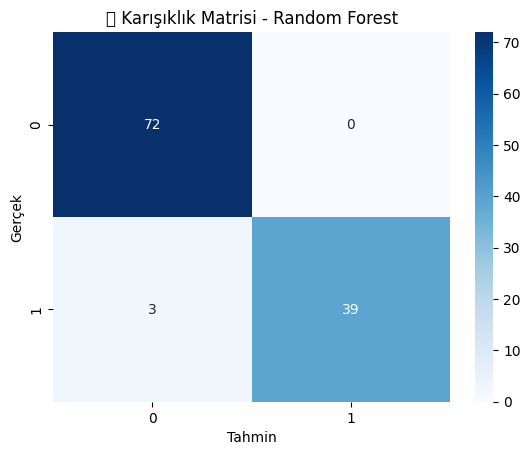

In [18]:
# Random Forest modeli
rf_model = RandomForestClassifier(random_state=42)

# Pipeline oluştur
pipeline = create_pipeline(rf_model)

# Eğit
pipeline.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = pipeline.predict(X_test)

# Sonuçları yazdır
print("✅ Random Forest Model Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Karışıklık matrisi görselleştir
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("📊 Karışıklık Matrisi - Random Forest")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

### 📉 Lojistik Regresyon Modeli

- **Model Oluşturma:** `LogisticRegression` ile doğrusal sınıflandırma modeli kuruldu (`max_iter=1000` ile maksimum iterasyon sınırı belirlendi).  
- **Eğitim:** Pipeline kullanılarak veri ölçeklendirilip model eğitildi (`pipeline.fit()`).  

✅ Lojistik Regresyon Sonuçları:
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



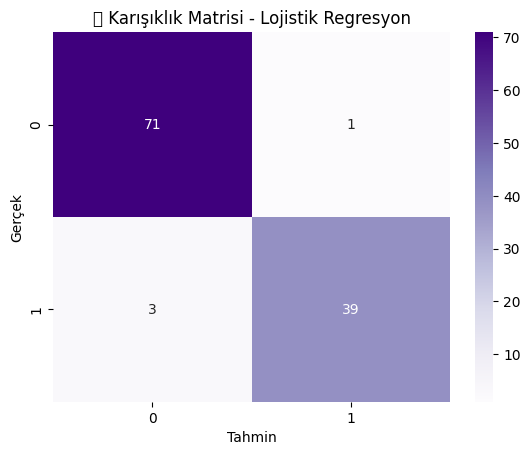

In [19]:
from sklearn.linear_model import LogisticRegression

# Model oluştur
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Pipeline oluştur
pipeline = create_pipeline(lr_model)

# Eğit
pipeline.fit(X_train, y_train)

# Tahmin
y_pred = pipeline.predict(X_test)

# Değerlendirme
print("✅ Lojistik Regresyon Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Görselleştirme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples")
plt.title("📊 Karışıklık Matrisi - Lojistik Regresyon")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

### 🧮 Destek Vektör Makineleri (SVM)

- **Model:** `SVC` sınıfı kullanılarak lineer çekirdek (`kernel="linear"`) ile SVM modeli oluşturuldu.  
- **Eğitim:** Pipeline kullanılarak veri ölçeklendirilip model eğitildi.  

✅ SVM (Linear Kernel) Sonuçları:
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



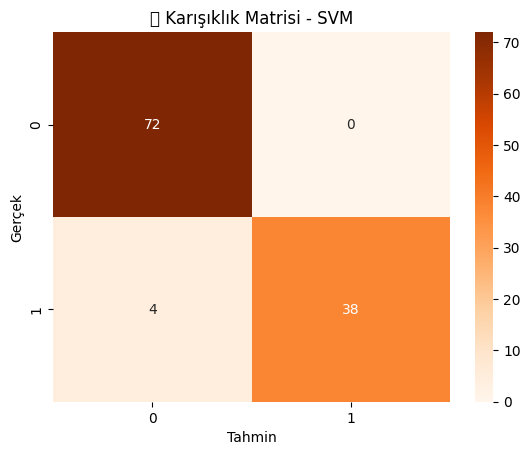

In [20]:
from sklearn.svm import SVC

# Model oluştur
svm_model = SVC(kernel="linear", random_state=42)

# Pipeline oluştur
pipeline = create_pipeline(svm_model)

# Eğit
pipeline.fit(X_train, y_train)

# Tahmin
y_pred = pipeline.predict(X_test)

# Değerlendirme
print("✅ SVM (Linear Kernel) Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Görselleştirme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Oranges")
plt.title("📊 Karışıklık Matrisi - SVM")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

### 🔍 K-Nearest Neighbors (KNN)

- **Model:** `KNeighborsClassifier` kullanılarak `k=5` komşulu KNN modeli oluşturuldu.  
- **Eğitim:** Pipeline ile veri ölçeklendirilip model eğitildi.  

✅ KNN Sonuçları:
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



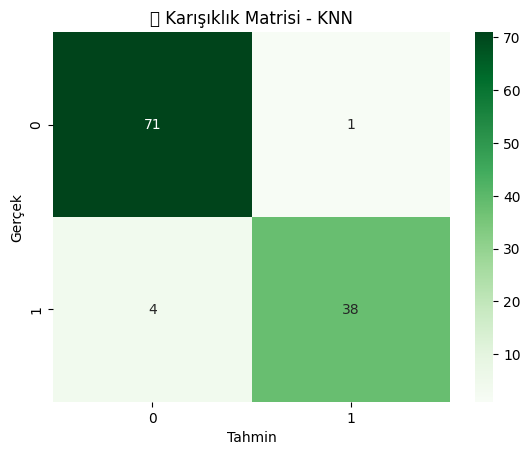

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Model oluştur
knn_model = KNeighborsClassifier(n_neighbors=5)

# Pipeline oluştur
pipeline = create_pipeline(knn_model)

# Eğit
pipeline.fit(X_train, y_train)

# Tahmin
y_pred = pipeline.predict(X_test)

# Değerlendirme
print("✅ KNN Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Görselleştirme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("📊 Karışıklık Matrisi - KNN")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

### 📐 Naive Bayes (GaussianNB)

- **Model:** `GaussianNB` sınıfı kullanılarak normal dağılıma dayalı Naive Bayes modeli oluşturuldu.  
- **Eğitim:** Pipeline ile veri ölçeklendirilmeden model eğitildi (Naive Bayes genellikle ölçeklendirme gerektirmez).  

✅ Naive Bayes Sonuçları:
Accuracy: 0.9210526315789473
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



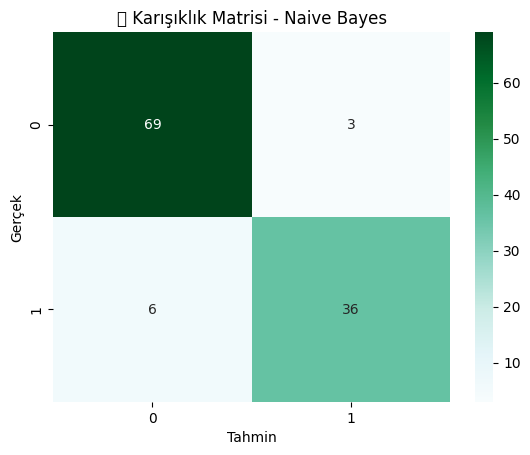

In [22]:
from sklearn.naive_bayes import GaussianNB

# Model oluştur
nb_model = GaussianNB()

# Pipeline oluştur
pipeline = create_pipeline(nb_model)

# Eğit
pipeline.fit(X_train, y_train)

# Tahmin
y_pred = pipeline.predict(X_test)

# Değerlendirme
print("✅ Naive Bayes Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Görselleştirme
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="BuGn")
plt.title("📊 Karışıklık Matrisi - Naive Bayes")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

### 🚀 XGBoost (XGBClassifier)

- **Model:** `XGBClassifier` kullanılarak yüksek doğruluk ve düşük overfitting hedefleyen bir model oluşturuldu (`use_label_encoder=False` ve `eval_metric='logloss'` ayarları ile).  
- **Eğitim:** Pipeline kullanılarak veri ölçeklendirilip model eğitildi.  

✅ XGBoost Sonuçları:
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



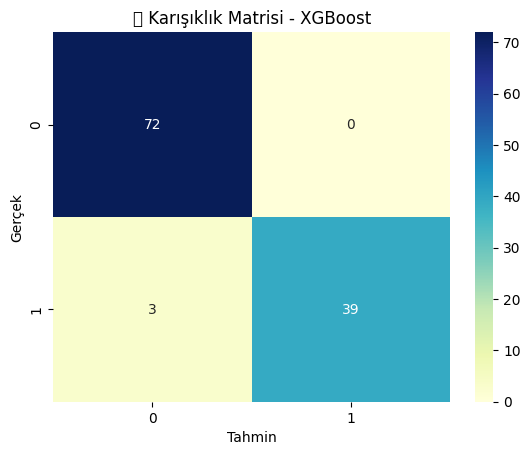

In [25]:
from xgboost import XGBClassifier

# XGBoost modelini oluştur
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Pipeline oluştur
pipeline = create_pipeline(xgb_model)

# Eğit
pipeline.fit(X_train, y_train)

# Tahmin yap
y_pred = pipeline.predict(X_test)

# Değerlendir
print("✅ XGBoost Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Görselleştir
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title("📊 Karışıklık Matrisi - XGBoost")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

### 🐱 CatBoost (CatBoostClassifier)

- **Model:** `CatBoostClassifier` kullanılarak kategorik verilerle iyi çalışan, hızlı ve yüksek doğruluklu bir model oluşturuldu (`verbose=0` ile eğitim sırasında çıktı bastırılmadı).  
- **Eğitim:** Pipeline ile veri ölçeklendirilip model eğitildi.  

✅ CatBoost Sonuçları:
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



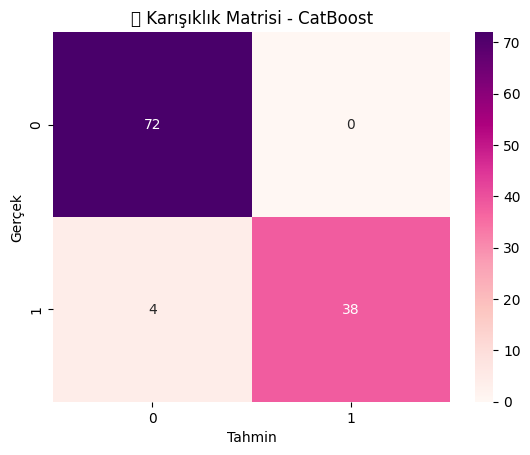

In [26]:
from catboost import CatBoostClassifier

# CatBoost modelini oluştur
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Pipeline oluştur
pipeline = create_pipeline(cat_model)

# Eğit
pipeline.fit(X_train, y_train)

# Tahmin yap
y_pred = pipeline.predict(X_test)

# Değerlendir
print("✅ CatBoost Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Görselleştir
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="RdPu")
plt.title("📊 Karışıklık Matrisi - CatBoost")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

### 📊 Makine Öğrenmesi Modelleri Sonuç Karşılaştırması

| Model              | Doğruluk (Accuracy) |
|---------------------|---------------------|
| Random Forest       | **0.974**           |
| Lojistik Regresyon  | 0.965               |
| SVM (Linear Kernel) | 0.965               |
| KNN                 | 0.956               |
| Naive Bayes         | 0.921               |
| XGBoost             | **0.974**           |
| CatBoost            | 0.965               |

**Not:** En yüksek doğruluk değerine sahip modeller **Random Forest** ve **XGBoost** oldu.  

### 🔍 Hiperparametre Optimizasyonu (GridSearchCV)

- **Pipeline Tanımlaması:** `RandomForestClassifier` modeli, `StandardScaler` ile birlikte pipeline içine alındı.  
- **Parametre Izgarası:** Modelin performansını artırmak için çeşitli hiperparametre kombinasyonları (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`) tanımlandı.  
- **GridSearchCV:** 5 katlı çapraz doğrulama (`cv=5`) ile en iyi hiperparametre setini bulmak için `GridSearchCV` kullanıldı (`n_jobs=-1` ile tüm çekirdekler kullanıldı).  

In [7]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

### 🏆 GridSearchCV Sonuçları

- **En İyi Parametreler:** Optimum hiperparametreler (`grid_search.best_params_`) ve en yüksek çapraz doğrulama skoru (`grid_search.best_score_`) görüntülendi.  
- **Test Seti Performansı:** En iyi model (`best_estimator_`) test verisi üzerinde doğrulandı ve sonuçları raporlandı.  

🔍 En İyi Parametreler: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
🏅 En İyi CV Skoru: 0.9626

✅ RF (GridSearchCV) Test Sonuçları:
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



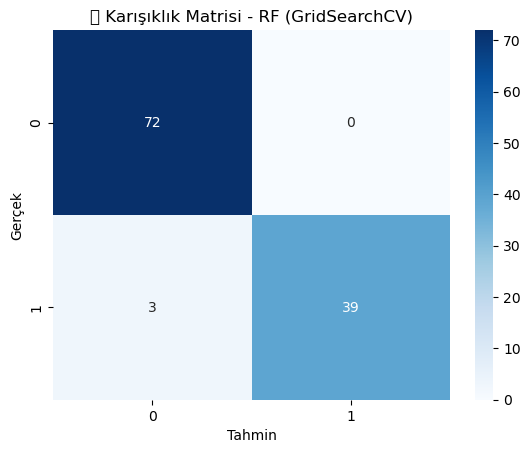

In [8]:
# 4. En iyi parametreler ve CV skoru
print("🔍 En İyi Parametreler:", grid_search.best_params_)
print("🏅 En İyi CV Skoru: {:.4f}".format(grid_search.best_score_))

# 5. Test seti performansı
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n✅ RF (GridSearchCV) Test Sonuçları:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("📊 Karışıklık Matrisi - RF (GridSearchCV)")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

### 🤖 Derin Öğrenme - MLP Modeli

#### **📐 Model Mimarisi ve Eğitim**

- **Ölçekleme:** Giriş verisi, `StandardScaler` ile normalize edildi.  
- **Katman Yapısı:**  
  - Giriş katmanı (`Input`)  
  - Batch Normalization katmanları (`BatchNormalization`)  
  - İki yoğun katman (`Dense`)  
  - Dropout (`Dropout`) ile aşırı öğrenme (overfitting) önlenmesi  
  - Çıkış katmanı (`Dense`), `sigmoid` aktivasyon fonksiyonu ile ikili sınıflandırma yapar.  
- **Optimizasyon:**  
  - `adam` optimizatörü, `binary_crossentropy` kaybı ve `AUC` ile `accuracy` metrikleri kullanıldı.  
- **Erken Durdurma ve Öğrenme Oranı Azaltma:**  
  - `EarlyStopping` (patience=5) ve `ReduceLROnPlateau` (patience=2, factor=0.3) ile eğitim süreci optimize edildi.  
- **Ağırlık Dengesi:** `class_weight` parametresi ile dengesiz veri setinde M sınıfı için ağırlık artırıldı.  

#### **⚙️ Eşik Ayarı ve Sonuçlar**

- **Eşik Belirleme:** `precision_recall_curve()` ile en iyi F1 skoru için optimal eşik (`best_th`) belirlendi.  
- **Sonuçlar:** Confusion matrix ve sınıflandırma raporu (`classification_report`) ile modelin performansı değerlendirildi.  


In [24]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Ölçekleme
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# MLP mimarisi (64 ➜ 32 nöron, küçük dropout, BN)
inp = Input(shape=(X_train.shape[1],))
x = BatchNormalization()(inp)
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inp, out)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC', 'accuracy'])

cb = [EarlyStopping(patience=5, restore_best_weights=True),
      ReduceLROnPlateau(patience=2, factor=0.3, min_lr=1e-5)]

history = model.fit(
    X_train_sc, y_train,
    validation_split=0.2,
    epochs=60,
    batch_size=16,
    class_weight={0:1, 1:1.7},
    callbacks=cb,
    verbose=2
)

Epoch 1/60
23/23 - 5s - 198ms/step - AUC: 0.7571 - accuracy: 0.6758 - loss: 0.7595 - val_AUC: 0.9615 - val_accuracy: 0.8462 - val_loss: 0.4851 - learning_rate: 1.0000e-03
Epoch 2/60
23/23 - 0s - 12ms/step - AUC: 0.9694 - accuracy: 0.8929 - loss: 0.3210 - val_AUC: 0.9730 - val_accuracy: 0.9121 - val_loss: 0.3661 - learning_rate: 1.0000e-03
Epoch 3/60
23/23 - 0s - 10ms/step - AUC: 0.9641 - accuracy: 0.8929 - loss: 0.3215 - val_AUC: 0.9792 - val_accuracy: 0.9231 - val_loss: 0.3128 - learning_rate: 1.0000e-03
Epoch 4/60
23/23 - 0s - 12ms/step - AUC: 0.9875 - accuracy: 0.9423 - loss: 0.2162 - val_AUC: 0.9847 - val_accuracy: 0.9231 - val_loss: 0.2699 - learning_rate: 1.0000e-03
Epoch 5/60
23/23 - 0s - 10ms/step - AUC: 0.9861 - accuracy: 0.9478 - loss: 0.2256 - val_AUC: 0.9831 - val_accuracy: 0.9231 - val_loss: 0.2382 - learning_rate: 1.0000e-03
Epoch 6/60
23/23 - 0s - 11ms/step - AUC: 0.9874 - accuracy: 0.9368 - loss: 0.2053 - val_AUC: 0.9836 - val_accuracy: 0.9231 - val_loss: 0.2200 - learn

In [25]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import numpy as np

# Tahmin olasılıkları
probs = model.predict(X_test_sc, verbose=0).ravel()

# En iyi F1 için eşik bul
prec, rec, th = precision_recall_curve(y_test, probs)
f1 = 2*prec*rec/(prec+rec+1e-9)
best_th = th[f1.argmax()]
print("Seçilen eşik:", best_th)

y_pred = (probs > best_th).astype(int)

Seçilen eşik: 0.59647


In [26]:
new_pred = (probs > 0.50).astype(int)
print(confusion_matrix(y_test, new_pred))
print(classification_report(y_test, new_pred))

[[72  0]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



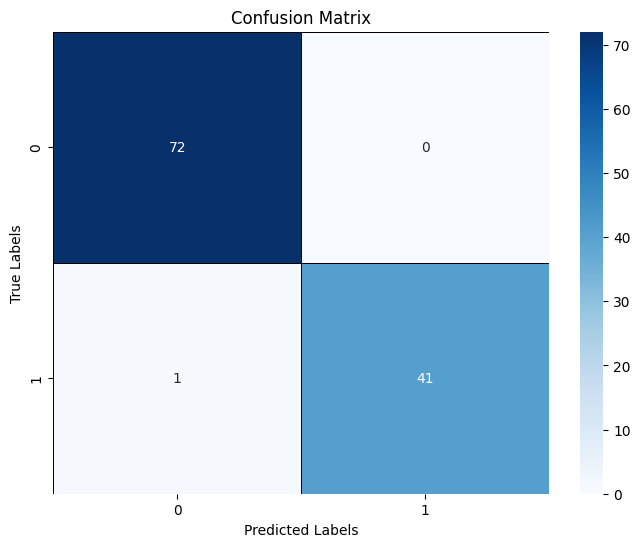

In [27]:
cm = confusion_matrix(y_test, new_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 📈 ROC Eğrisi ve AUC (MLP Modeli)

- **ROC Eğrisi:** Modelin doğru pozitif (TPR) ve yanlış pozitif (FPR) oranlarını farklı eşiklerde gösterir.  
- **AUC:** Eğri altındaki alan, modelin genel doğruluğunu ifade eder (1.0 en iyi, 0.5 rastgele).  

In [ ]:
from sklearn.metrics import roc_curve, auc

# MLP modelinden olasılık tahminleri al
mlp_probs = model.predict(X_test_sc, verbose=0).ravel()

# ROC eğrisi için gerçek ve tahmin değerlerini kullan
fpr, tpr, thresholds = roc_curve(y_test, mlp_probs)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"MLP (AUC = {roc_auc:.4f})", color="darkorange", linewidth=2)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", linewidth=2)
plt.title("ROC Eğrisi - MLP Modeli")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 💾 Model ve Parametrelerin Kaydedilmesi

- **Model Kaydı:** Eğitilen `MLP` modeli (`breast_mlp.h5`), ağırlıklar dahil olmak üzere `.h5` formatında kaydedildi.  
- **Ölçekleyici (Scaler):** Verinin aynı ölçeklendirme ile işlenebilmesi için `StandardScaler` modeli (`scaler.pkl`) kaydedildi.  
- **Karar Eşiği:** Modelin tahminlerini sınıflandırmak için kullanılan karar eşiği (`0.50`) `threshold.json` dosyasına kaydedildi.  
- **Özellik Sırası:** Modelin giriş sırasını korumak amacıyla sütun isimleri (`feature_order.csv`) kaydedildi.  

In [28]:
import joblib, json, pathlib
from tensorflow.keras.models import save_model

# 1) Model + ağırlıklar
save_model(model, "breast_mlp.h5")              

# 2) StandardScaler
joblib.dump(scaler, "scaler.pkl")              

# 3) Karar eşiği 
with open("threshold.json", "w") as f:
    json.dump({"threshold": 0.50}, f)

# 4) Sütun sırası  (Streamlit’te kullanıcı girdisini doğru sıraya sokmak için)
pd.Series(X_train.columns).to_csv("feature_order.csv", index=False, header=False)

print("🎉 Artefaktlar kaydedildi:",
      [p.name for p in pathlib.Path('.').glob('*') if p.suffix in {'.h5', '.pkl', '.json', '.csv'}])

🎉 Artefaktlar kaydedildi: ['breast_mlp.h5', 'data.csv', 'feature_order.csv', 'iyi.csv', 'kotu.csv', 'scaler.pkl', 'threshold.json']
